#  Predicting Hotel Booking Cancellation in Purtugal with Machine Learning

# About the project


Predicting Hotel Booking Cancellation in 
Portugal Project. Is a machine learning 
classification project that will try to predict 
whether a booking will be cancelled or a 
booking will not be cancelled using machine 
learning based on historical data.
 The data for this project is from Hotel 
Booking Demand Dataset Sciencedirect. This 
data was acquired by extraction from hotel’s 
Property management system from 2015 to 
2017 from hotel in Region Algarve and 
Lisbon

# Background Information

Hotel industry is one of the faster 
growing businesses of tourism 
sector, especially with the rise of 
giant OTA that make booking a 
hotel as easy as is ever been. 
According to Portugal’s National 
Institute of Statistic in 2017 hotel 
revenue rose approximately 18%  to 
$3.6 billion 

# Problem Statement
 With the increase trend of cancellation from year to 
year, some hotel have think that high cancellation in 
hotel is  the new norm of the industry which is a 
completely wrong approach.
 One out of four hotel guests are cancelling hotel 
booking ahead of a stay. This cancellation trend has 
effect the hotel not being able to accurately forecast 
occupancy within their revenue management.
 This trend of cancellation also have causes hotel 
loss in opportunity cost (unsold room due to 
cancellation)

# Project Goals
 1. The Goals of this project is to find out the 
characteristic  of customers who cancelled 
and finding a pattern in cancelled booking by 
doing an exploratory data analysis 
2. Building classification machine learning model 
to predict cancellation, that has accuracy 
score around 0.75 - 0.9

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [37]:
df = pd.read_csv("hotel_bookings.csv")
print(f"The Dataset has {df.shape[0]} rows and {df.shape[1]} columns")


df.head()

The Dataset has 119390 rows and 32 columns


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [39]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.is_canceled.value_counts(normalize=True)

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64

# Exploratory Data Analysis and cleaning

In [40]:
df.isnull().sum(axis=0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<Axes: xlabel='adr_zero', ylabel='count'>

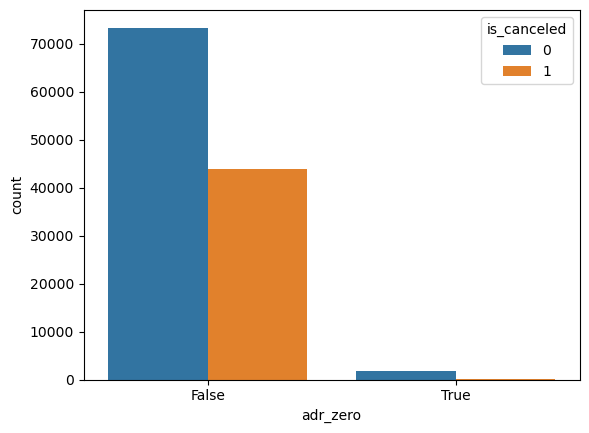

In [41]:
# we have some adr zero, which makes no sense hence we exclude them 

import matplotlib.pyplot as plt
import seaborn as sns


df['adr_zero'] = df['adr'] == 0

sns.countplot(data=df, x='adr_zero', hue=df['is_canceled'].astype(str))

In [42]:
# Renaming column to be more descriptive
df.rename(columns={'adr':'avg_daily_rate'},inplace=True)
# drop the agent column and company column since these are the just id number and are not particularly meaningfull
df = df.drop(['agent', 'company', 'country'], axis=1)
# Duplicative of Is_Canceled outcome variable
df = df.drop(['reservation_status'], axis=1)
# System field - not particiularly descriptive
df = df.drop(['reservation_status_date'], axis=1)


# Replace null values in the 'children' column with 0
df['children']= df['children'].fillna(0)
df['children'] = df['children'].astype('int64')

# create new column with total_guest_calculation for convenience
df['total_guests'] = df['babies']+df['children']+df['adults']

# Dropping rows where guest count is 0
df = df[df['total_guests'] > 0]

df = df[df['avg_daily_rate'] > 0]

df = df.drop(['adr_zero'], axis=1)

In [43]:
print(df.isnull().sum(axis = 0))
print(f"This data set has {df.shape[1]} rows and {df.shape[1]} columns")

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
avg_daily_rate                    0
required_car_parking_spaces       0
total_of_special_requests         0
total_guests                

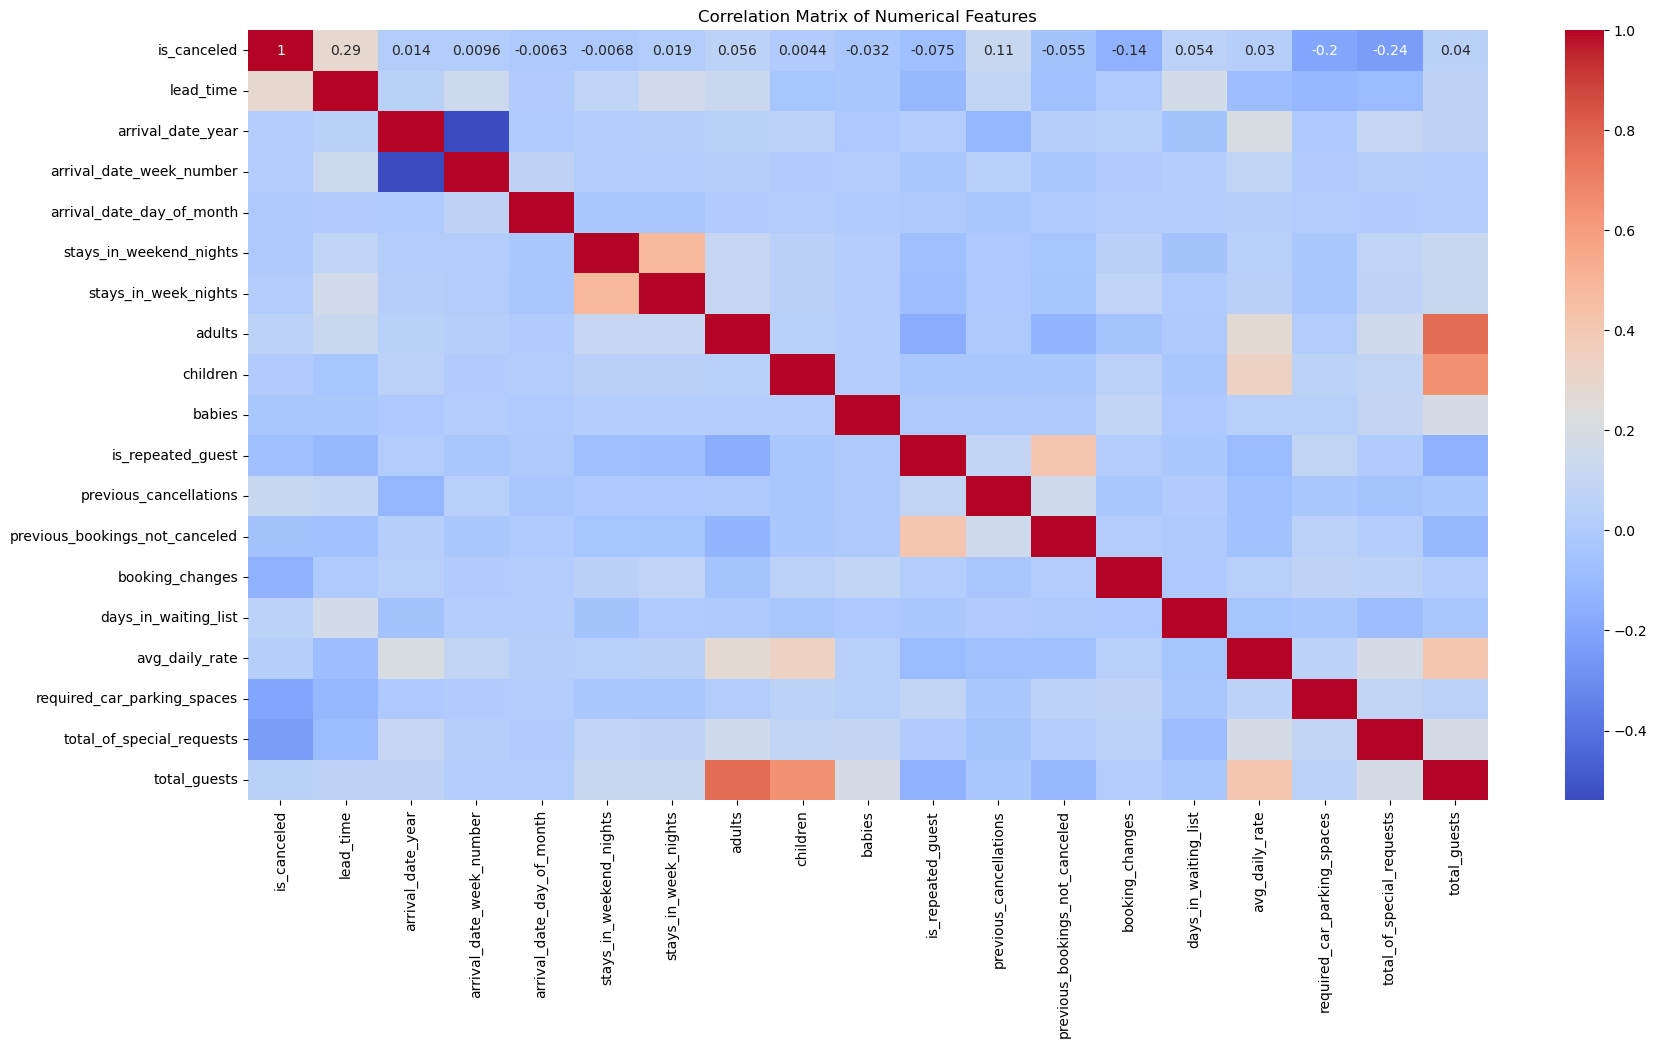

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot 1: Heatmap of correlation between numerical features
plt.figure(figsize=(20, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [45]:
# Dropping some highly correlated variables
df1 = df.drop(['adults','children','is_repeated_guest','arrival_date_year'], axis=1)

In [46]:
categorical_cols = df1.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nFrequency of '{col}':")
    print(df1[col].value_counts())


Frequency of 'hotel':
hotel
City Hotel      78092
Resort Hotel    39307
Name: count, dtype: int64

Frequency of 'arrival_date_month':
arrival_date_month
August       13707
July         12488
May          11608
April        10952
October      10929
June         10817
September    10349
March         9637
February      7919
November      6635
December      6558
January       5800
Name: count, dtype: int64

Frequency of 'meal':
meal
BB           90807
HB           14262
SC           10417
Undefined     1131
FB             782
Name: count, dtype: int64

Frequency of 'market_segment':
market_segment
Online TA        56089
Offline TA/TO    23885
Groups           19557
Direct           12361
Corporate         5211
Aviation           231
Complementary       63
Undefined            2
Name: count, dtype: int64

Frequency of 'distribution_channel':
distribution_channel
TA/TO        96889
Direct       13833
Corporate     6483
GDS            189
Undefined        5
Name: count, dtype: int64

Freque

In [47]:
#Recoding categorical variables to numeric where possible
df1['arrival_date_month'] = df1['arrival_date_month'].map({'January' : 1, "February" : 2, 'March' : 3, "April" : 4, 
                                                                    'May' : 5, "June" : 6, 'July' : 7, "August" : 8,
                                                                     'September' : 9, "October": 10, "November" : 11, "December" : 12 })
                                                                     

categorical_cols = df1.select_dtypes(include=['object']).columns
df1 = pd.get_dummies(df1, columns=categorical_cols, drop_first=True)

In [48]:
df1.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,babies,previous_cancellations,previous_bookings_not_canceled,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
2,0,7,7,27,1,0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,0,13,7,27,1,0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,0,14,7,27,1,0,2,0,0,0,...,False,False,False,False,False,False,False,False,True,False
5,0,14,7,27,1,0,2,0,0,0,...,False,False,False,False,False,False,False,False,True,False
6,0,0,7,27,1,0,2,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [49]:
df1.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
babies                              int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
avg_daily_rate                    float64
required_car_parking_spaces         int64
total_of_special_requests           int64
total_guests                        int64
hotel_Resort Hotel                   bool
meal_FB                              bool
meal_HB                              bool
meal_SC                              bool
meal_Undefined                       bool
market_segment_Complementary         bool
market_segment_Corporate             bool
market_segment_Direct             

In [50]:
df1.describe()

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,total_guests
count,117399.000000,117399.000000,117399.000000,117399.000000,117399.000000,117399.000000,117399.000000,117399.000000,117399.000000,117399.000000,117399.000000,117399.000000,117399.000000,117399.000000,117399.000000,117399.000000
mean,0.374884,105.094370,6.545908,27.136091,15.802826,0.936064,2.520413,0.007871,0.086968,0.125274,0.215845,2.338555,103.542124,0.062624,0.570993,1.973526
std,0.484095,106.913558,3.083408,13.575037,8.783448,0.994577,1.889985,0.097181,0.848797,1.446157,0.630927,17.679346,49.192931,0.245534,0.791637,0.646538
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000,1.000000
25%,0.000000,19.000000,4.000000,16.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.530000,0.000000,0.000000,2.000000
50%,0.000000,71.000000,7.000000,27.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2.000000
75%,1.000000,162.000000,9.000000,38.000000,23.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2.000000
max,1.000000,709.000000,12.000000,53.000000,31.000000,19.000000,50.000000,10.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000,12.000000


# Additional EDA for Cancelations (is_cancelation)

deposit_type_Non Refund           0.481439
lead_time                         0.290513
total_of_special_requests        -0.237318
market_segment_Groups             0.223905
required_car_parking_spaces      -0.197514
distribution_channel_TA/TO        0.173443
market_segment_Direct            -0.156561
distribution_channel_Direct      -0.148926
booking_changes                  -0.144591
hotel_Resort Hotel               -0.137863
customer_type_Transient           0.134890
assigned_room_type_D             -0.130263
customer_type_Transient-Party    -0.125108
previous_cancellations            0.110667
market_segment_Corporate         -0.082575
assigned_room_type_E             -0.066134
previous_bookings_not_canceled   -0.054843
assigned_room_type_C             -0.054417
days_in_waiting_list              0.054103
reserved_room_type_D             -0.049516
assigned_room_type_F             -0.046033
customer_type_Group              -0.041897
meal_FB                           0.039768
total_guest

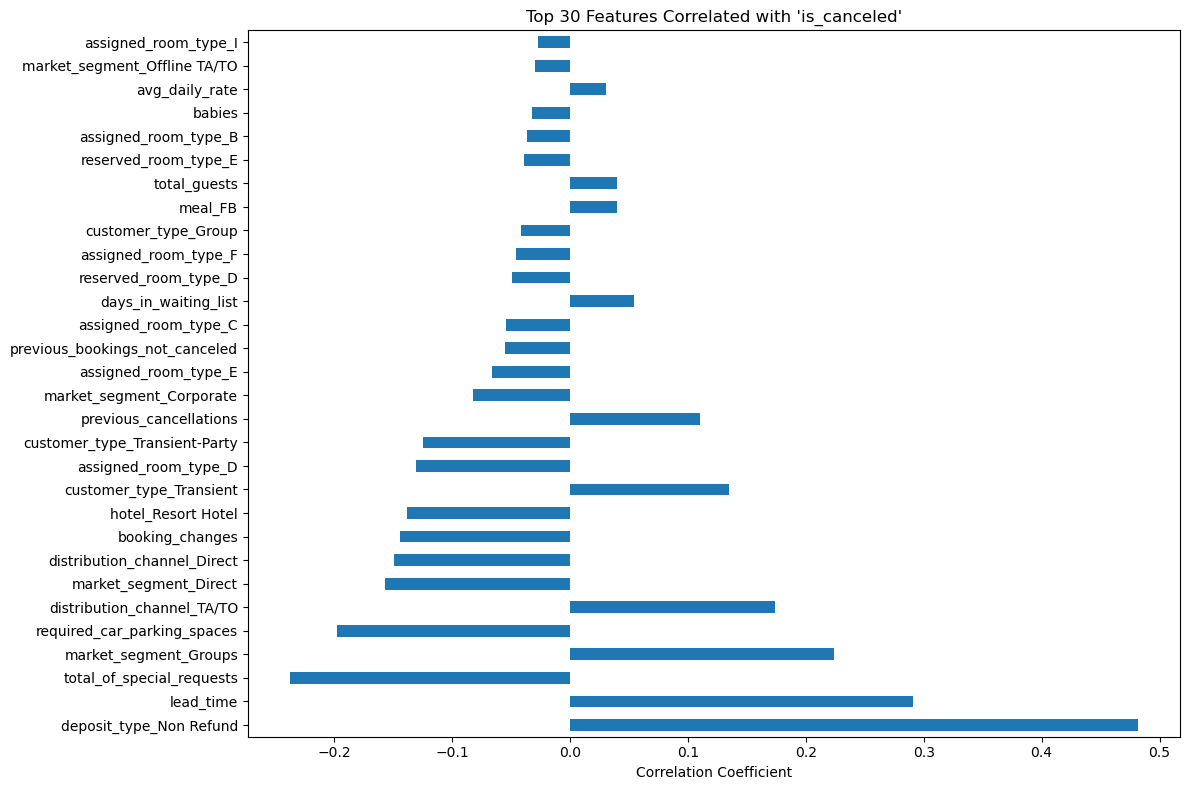

In [51]:
correlation_series = df1.corr()['is_canceled'].drop('is_canceled')  # drop self-correlation
top_30_corr = correlation_series.abs().sort_values(ascending=False).head(30)

signed_top_30 = correlation_series.loc[top_30_corr.index]
print(signed_top_30)


plt.figure(figsize=(12, 8))  # Width = 12, Height = 8
signed_top_30.plot(kind='barh')
plt.title("Top 30 Features Correlated with 'is_canceled'")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

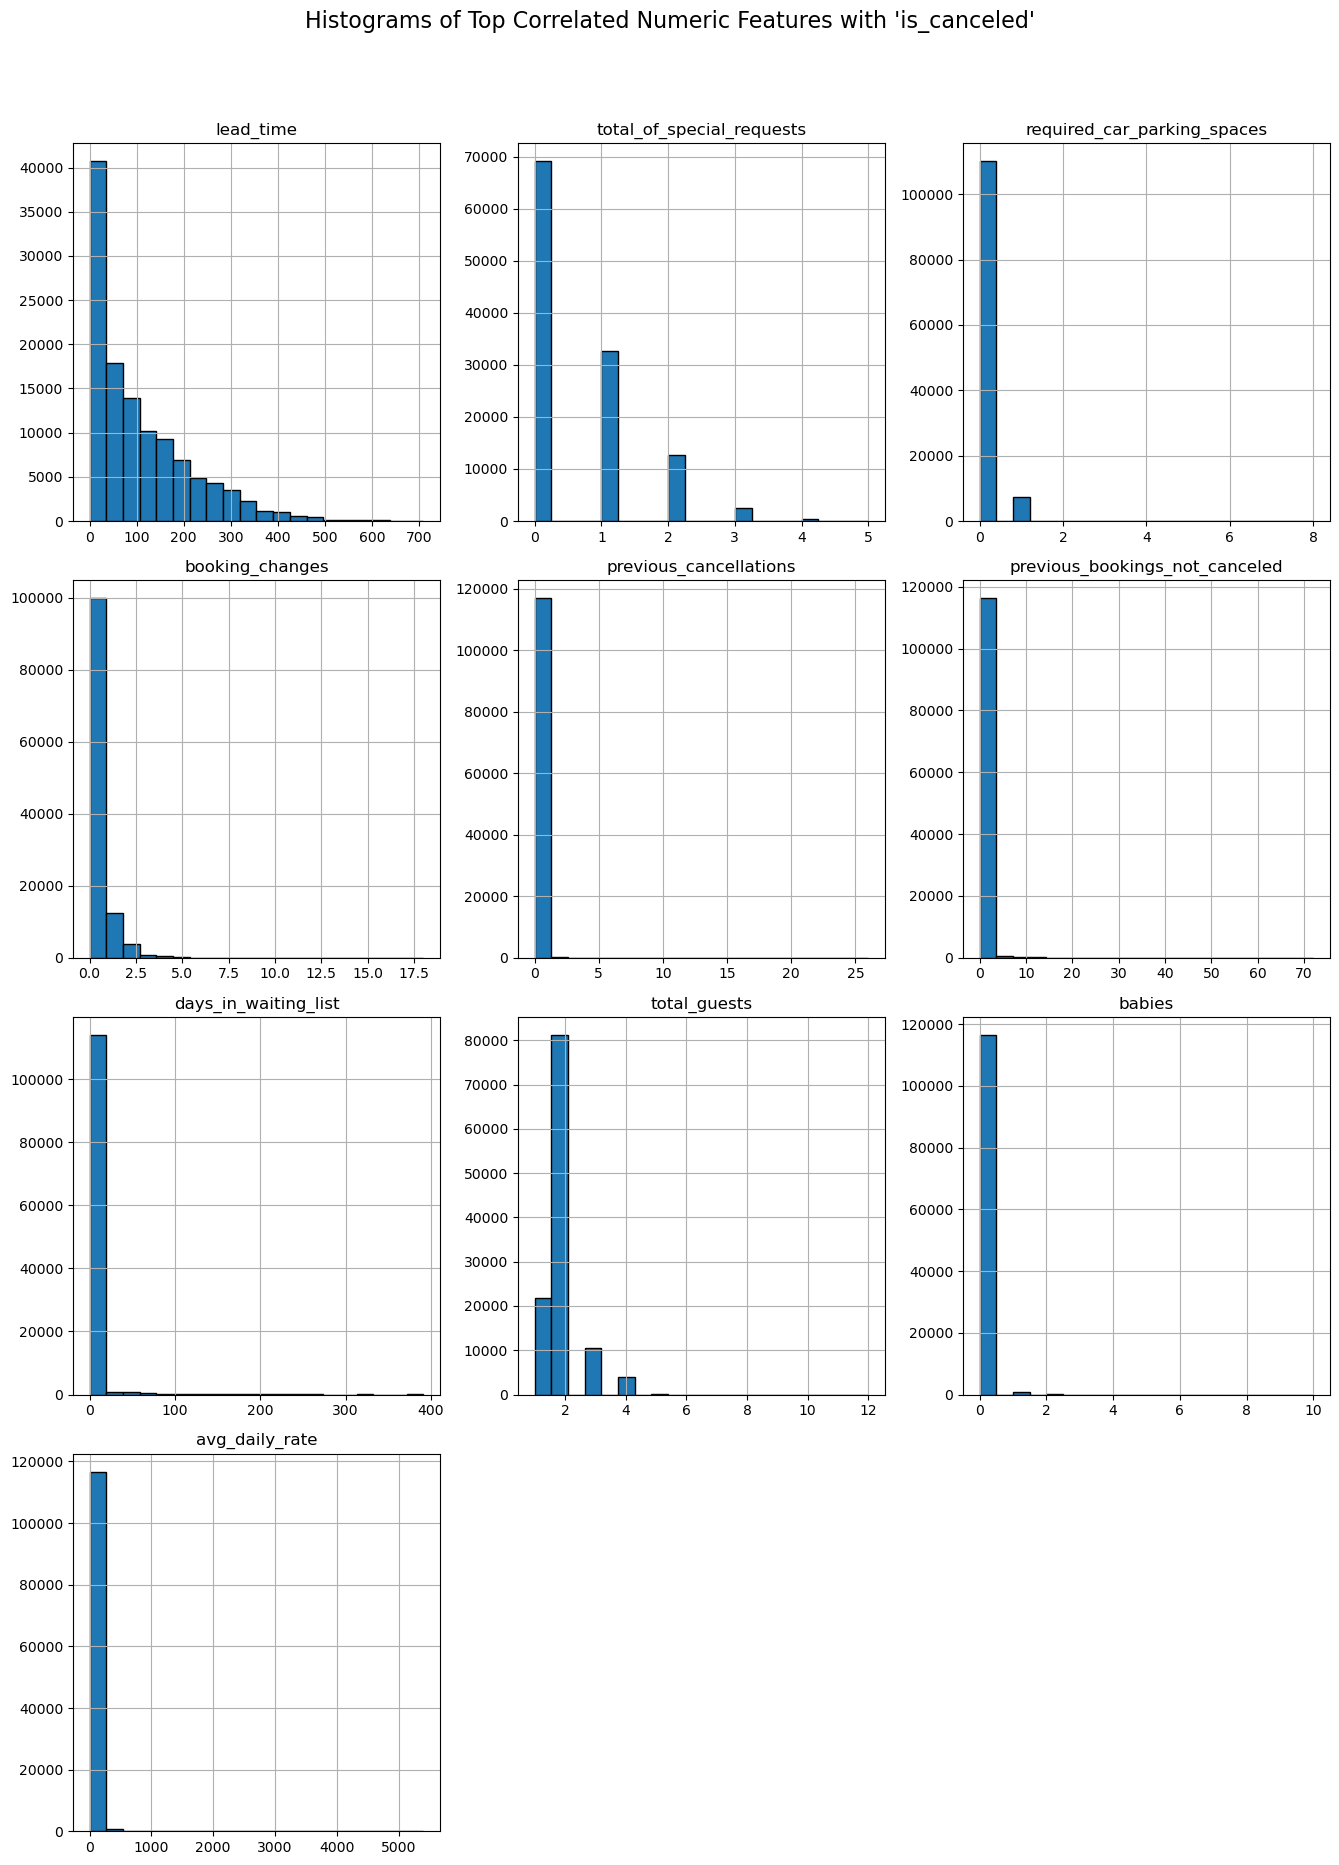

In [52]:
#plotting all the continous varaibles histogram
# Select int64 and float64 columns
numeric_cols = df1.select_dtypes(include=['int64', 'float64']).columns
top_numeric_features = [col for col in signed_top_30.index if col in numeric_cols]

# Plot histograms
df1[top_numeric_features].hist(bins=20, figsize=(15, 20), edgecolor='black')
plt.suptitle("Histograms of Top Correlated Numeric Features with 'is_canceled'", fontsize=16)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()

In [53]:
#What is the proportion of is_canceled ?
 
df1.is_canceled.value_counts(normalize=True)

is_canceled
0    0.625116
1    0.374884
Name: proportion, dtype: float64

is_canceled,0,1,all
deposit_type_Non Refund,,,
False,73295,29517,102812
True,93,14494,14587
all,73388,44011,117399


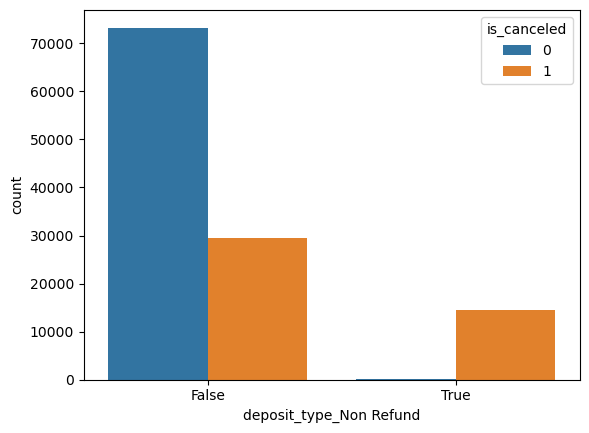

In [59]:
sns.countplot(x='deposit_type_Non Refund', hue=df1['is_canceled'].astype(str),data=df1)


pd.crosstab(index = df1['deposit_type_Non Refund'],columns = df1.is_canceled,margins=True, margins_name = "all")

# we can see that fewer people book if the booking is non refundable ; but the number of booking is really high
#if the booking is refundable.

#due to lower booking we can see that the cancellation is high; percentage seems too high.
#Lets look more at booking which has refundable; they pay high( as refundable usually pay high) and does not cancel.

Text(0.5, 1.0, 'Lead Time vs Cancellation')

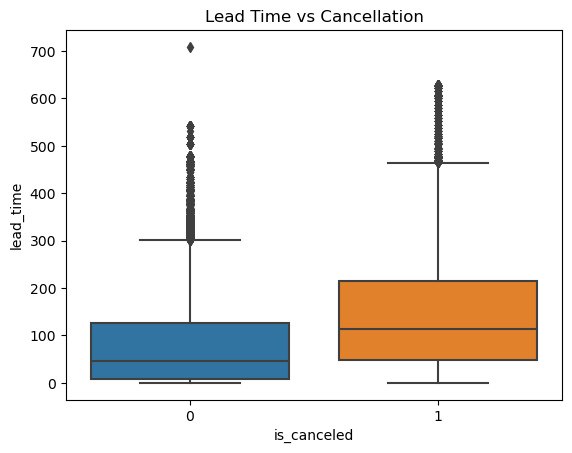

In [60]:
sns.boxplot(x='is_canceled', y='lead_time', data=df1)
plt.title("Lead Time vs Cancellation")

# We can see below that shorter lead time meaning last minute booking and certain travel hence,tend to cancel less
#Very well in advance -higher lead time may cancel more. -- may be flexible booking for early bird.
#Outliers will be definately present. 

Text(0.5, 1.0, 'total_of_special_requests vs Cancellation')

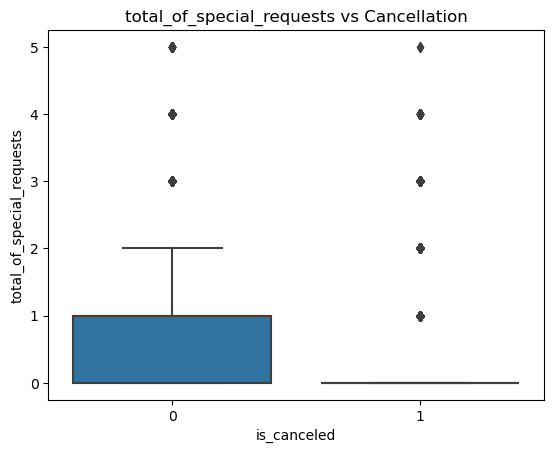

In [61]:
sns.boxplot(x='is_canceled', y='total_of_special_requests', data=df1)
plt.title("total_of_special_requests vs Cancellation")

#more special requests then we can see less cancellation.
#most canceled booking has no special request.

is_canceled,0,1,all
market_segment_Groups,,,
False,65904,31938,97842
True,7484,12073,19557
all,73388,44011,117399


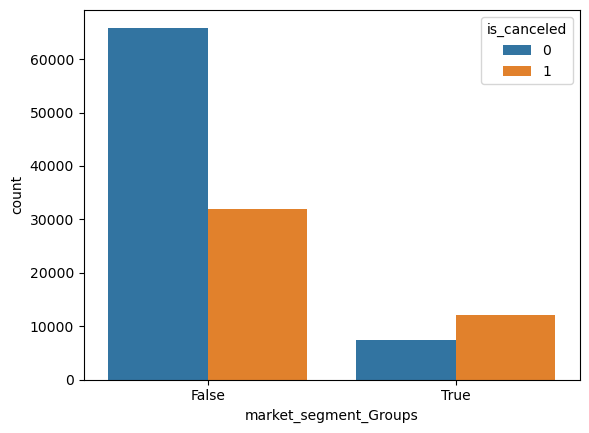

In [63]:
sns.countplot(x='market_segment_Groups', hue=df1['is_canceled'].astype(str), data=df1)


pd.crosstab(index = df1['market_segment_Groups'],columns = df1.is_canceled,margins=True, margins_name = "all")

#Bookings that come from the "Groups" market segment are more likely to get canceled than other types of bookings

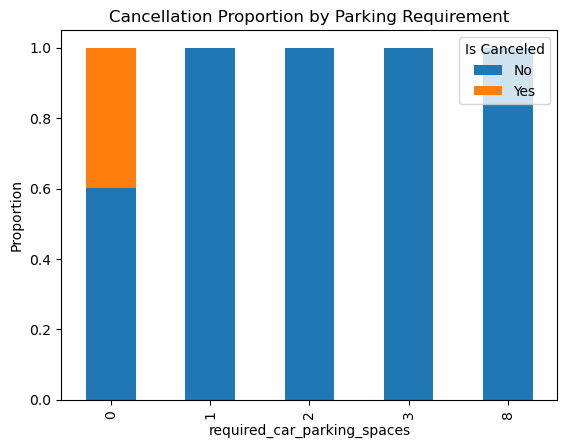

In [64]:
parking_crosstab = pd.crosstab(df1['required_car_parking_spaces'], df1['is_canceled'], normalize='index')

parking_crosstab.plot(kind='bar', stacked=True)
plt.ylabel('Proportion')
plt.title('Cancellation Proportion by Parking Requirement')
plt.legend(title='Is Canceled', labels=['No', 'Yes'])

#This plot below shows that guests who are more likely to make request for more parking are likely to show up.
#Hence, negative correlated if they ask for more parking space they will not cancel.

#I am removing it as highly unstable

In [ ]:
sns.countplot(x='deposit_type_Non Refund', hue=df1['is_canceled'].astype(str), data=df1)


is_canceled,0,1,all
distribution_channel_TA/TO,,,
False,16564,3946,20510
True,56824,40065,96889
all,73388,44011,117399


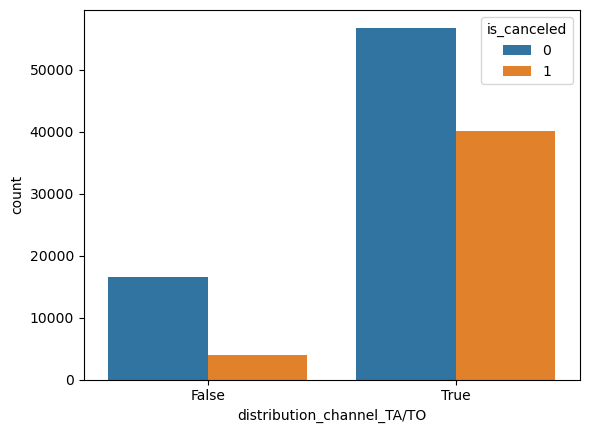

In [66]:
sns.countplot(x='distribution_channel_TA/TO', hue=df1['is_canceled'].astype(str), data=df1)

pd.crosstab(index = df1['distribution_channel_TA/TO'],columns = df1.is_canceled,margins=True, margins_name = "all")

#most booking done by agents or tour agency henc, higher cancellation too.

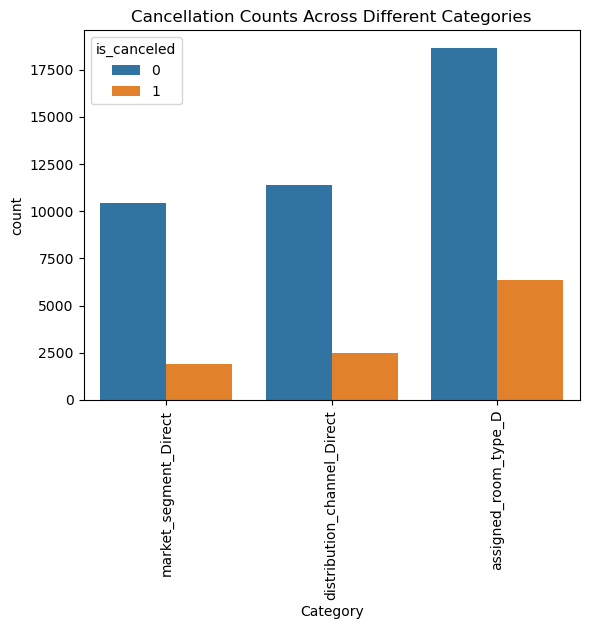

In [71]:
# Reshape your data: convert multiple dummy columns into one long-form column
melted_df = df1.melt(id_vars='is_canceled', 
                     value_vars=[ 'market_segment_Direct','distribution_channel_Direct','assigned_room_type_D'],
                     var_name='Category', 
                     value_name='Value')

# Filter only where dummy = 1
melted_df = melted_df[melted_df['Value'] == 1]

# Plot
sns.countplot(data=melted_df, x='Category', hue=melted_df['is_canceled'].astype(str))
plt.xticks(rotation=90)
plt.title("Cancellation Counts Across Different Categories")
plt.show()
 
#market_segment_Direct: when booking done directly by the customer then less likely to cancel, it.
#Distribution_channel_Direct: when booking done directly by the customer then less likely to cancel, it.
#assigned_room_type_D: when booking mid level(delux) rooms the cancellations are less likely to happen by the customer 


C:\Users\91831\AppData\Local\Temp\ipykernel_31296\2480518995.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_canceled', y='booking_changes', data=df1, ci=None)


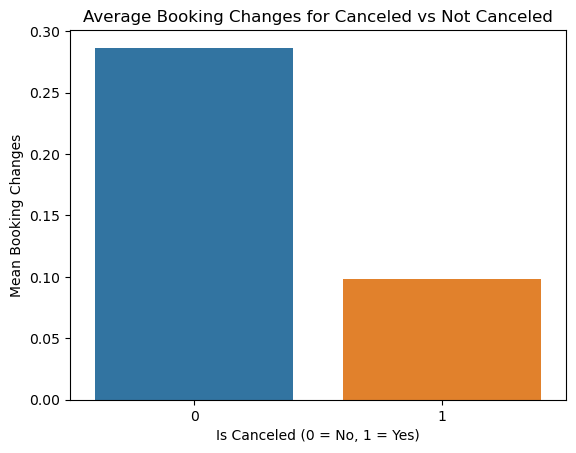

In [72]:
sns.barplot(x='is_canceled', y='booking_changes', data=df1, ci=None)
plt.title("Average Booking Changes for Canceled vs Not Canceled")
plt.xlabel("Is Canceled (0 = No, 1 = Yes)")
plt.ylabel("Mean Booking Changes")
plt.show()

#The more changes a person makes to their booking, the less likely they are to cancel


# Predicting cancellations
___________________________



# Logistic Regression

In [73]:
#Iteration 1: 

import statsmodels.api as sm

from sklearn.model_selection import train_test_split

X=df1[["deposit_type_Non Refund", "lead_time", "total_of_special_requests", "market_segment_Groups", 
                               "distribution_channel_TA/TO", "market_segment_Direct", 
                              "distribution_channel_Direct", "booking_changes", "hotel_Resort Hotel", "customer_type_Transient", 
                              "assigned_room_type_D", "customer_type_Transient-Party", "previous_cancellations", "market_segment_Corporate",
                              "assigned_room_type_E", "previous_bookings_not_canceled", "assigned_room_type_C", "days_in_waiting_list", 
                              "reserved_room_type_D", "assigned_room_type_F", "customer_type_Group", "meal_FB", "total_guests", 
                              "reserved_room_type_E", "assigned_room_type_B", 
                              "babies", "avg_daily_rate", "market_segment_Offline TA/TO", "assigned_room_type_I"]]
Y=df1["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


X_train_const = sm.add_constant(X_train)
  
# building the model and fitting the data
log_reg = sm.Logit(y_train, X_train_const.astype(float)).fit()

log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.446295
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_canceled   No. Observations:                93919
Model:                          Logit   Df Residuals:                    93889
Method:                           MLE   Df Model:                           29
Date:                Sun, 26 Oct 2025   Pseudo R-squ.:                  0.3249
Time:                        01:39:06   Log-Likelihood:                -41916.
converged:                       True   LL-Null:                       -62091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.8236      0.095    -19.141      0.000      -2.010      -1.637
deposit_type_Non Refund            5.4524      0.127     42.854      0.000       5.203       5.702
lead_time                          0.0042   9.88e-05     42.409      0.000       0.004       0.004
total_of_special_requests         -0.7320      0.013    -57.517      0.000      -0.757      -0.707
market_segment_Groups             -0.6739      0.043    -15.658      0.000      -0.758      -0.590
distribution_channel_TA/TO         0.2537      0.068      3.725      0.000       0.120       0.387
market_segment_Direct             -0.7182      0.085     -8.428      0.000      -0.885      -0.551
distribution_channel_Direct       -0.2671      0.098     -2.712      0.007      -0.460      -0.074
booking_changes                   -0.3843      0.017    -22.311      0.000      -0.418      -0.351
hotel_Resort Hotel                -0.0342      0.020     -1.749      0.080      -0.073       0.004
customer_type_Transient            0.7886      0.060     13.124      0.000       0.671       0.906
assigned_room_type_D              -1.0451      0.043    -24.493      0.000      -1.129      -0.961
customer_type_Transient-Party      0.2890      0.064      4.545      0.000       0.164       0.414
previous_cancellations             2.5755      0.065     39.575      0.000       2.448       2.703
market_segment_Corporate          -0.6784      0.082     -8.253      0.000      -0.840      -0.517
assigned_room_type_E              -1.2242      0.072    -16.951      0.000      -1.366      -1.083
previous_bookings_not_canceled    -0.4983      0.031    -16.160      0.000      -0.559      -0.438
assigned_room_type_C              -0.6938      0.068    -10.154      0.000      -0.828      -0.560
days_in_waiting_list              -0.0009      0.001     -1.655      0.098      -0.002       0.000
reserved_room_type_D               0.8747      0.044     19.761      0.000       0.788       0.961
assigned_room_type_F              -0.7450      0.052    -14.346      0.000      -0.847      -0.643
customer_type_Group               -0.2915      0.197     -1.477      0.140      -0.678       0.095
meal_FB                            0.9361      0.115      8.139      0.000       0.711       1.162
total_guests                       0.1560      0.016     10.017      0.000       0.125       0.186
reserved_room_type_E               1.1271      0.074     15.179      0.000       0.982       1.273
assigned_room_type_B              -0.3365      0.065     -5.212      0.000      -0.463      -0.210
babies                             0.0936      0.096      0.976      0.329      -0.094       0.282
avg_daily_rate                     0.0031      0.000     14.453      0.000       0.003       0.004
market_segment_Offline TA/TO      -1.3096      0.029    -44.435      0.000      -1.367      -1.252
assigned_room_type_I              -2.7715      0.521     -5.323      0.00

In [74]:
#iteration 2:
#removing the high p-values :


X1=df1[["deposit_type_Non Refund", "lead_time", "total_of_special_requests", "market_segment_Groups", 
                               "distribution_channel_TA/TO", "market_segment_Direct", 
                              "distribution_channel_Direct", "booking_changes", "customer_type_Transient", 
                              "assigned_room_type_D", "customer_type_Transient-Party", "previous_cancellations", "market_segment_Corporate",
                              "assigned_room_type_E", "previous_bookings_not_canceled", "assigned_room_type_C", 
                              "reserved_room_type_D", "assigned_room_type_F", "meal_FB", "total_guests", 
                              "reserved_room_type_E", "assigned_room_type_B", 
                               "avg_daily_rate", "market_segment_Offline TA/TO", "assigned_room_type_I"]]
Y1=df1["is_canceled"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.20, random_state=42)


X_train_const1 = sm.add_constant(X_train1)
  
# building the model and fitting the data
log_reg1 = sm.Logit(y_train1, X_train_const1.astype(float)).fit()

log_reg1.summary()

Optimization terminated successfully.
         Current function value: 0.446342
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_canceled   No. Observations:                93919
Model:                          Logit   Df Residuals:                    93893
Method:                           MLE   Df Model:                           25
Date:                Sun, 26 Oct 2025   Pseudo R-squ.:                  0.3249
Time:                        01:39:40   Log-Likelihood:                -41920.
converged:                       True   LL-Null:                       -62091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.8666      0.093    -20.088      0.000      -2.049      -1.685
deposit_type_Non Refund            5.4580      0.127     42.918      0.000       5.209       5.707
lead_time                          0.0042    9.8e-05     42.537      0.000       0.004       0.004
total_of_special_requests         -0.7309      0.013    -57.624      0.000      -0.756      -0.706
market_segment_Groups             -0.6810      0.043    -15.873      0.000      -0.765      -0.597
distribution_channel_TA/TO         0.2533      0.068      3.721      0.000       0.120       0.387
market_segment_Direct             -0.7141      0.085     -8.413      0.000      -0.881      -0.548
distribution_channel_Direct       -0.2769      0.098     -2.820      0.005      -0.469      -0.084
booking_changes                   -0.3837      0.017    -22.401      0.000      -0.417      -0.350
customer_type_Transient            0.8198      0.057     14.303      0.000       0.707       0.932
assigned_room_type_D              -1.0492      0.043    -24.631      0.000      -1.133      -0.966
customer_type_Transient-Party      0.3186      0.061      5.231      0.000       0.199       0.438
previous_cancellations             2.5882      0.065     39.871      0.000       2.461       2.715
market_segment_Corporate          -0.6815      0.082     -8.289      0.000      -0.843      -0.520
assigned_room_type_E              -1.2318      0.072    -17.097      0.000      -1.373      -1.091
previous_bookings_not_canceled    -0.5031      0.031    -16.243      0.000      -0.564      -0.442
assigned_room_type_C              -0.7131      0.067    -10.600      0.000      -0.845      -0.581
reserved_room_type_D               0.8764      0.044     19.810      0.000       0.790       0.963
assigned_room_type_F              -0.7493      0.052    -14.458      0.000      -0.851      -0.648
meal_FB                            0.9276      0.115      8.087      0.000       0.703       1.152
total_guests                       0.1569      0.015     10.227      0.000       0.127       0.187
reserved_room_type_E               1.1182      0.074     15.109      0.000       0.973       1.263
assigned_room_type_B              -0.3299      0.064     -5.119      0.000      -0.456      -0.204
avg_daily_rate                     0.0031      0.000     14.749      0.000       0.003       0.004
market_segment_Offline TA/TO      -1.3128      0.029    -44.688      0.000      -1.370      -1.255
assigned_room_type_I              -2.7924      0.520     -5.365      0.000      -3.812      -1.772
==================================================================================================
"""

In [76]:
from sklearn.linear_model import LogisticRegression


#model = LogisticRegression(penalty=None, solver='lbfgs', fit_intercept=False, max_iter=10000)-- run this part if below does not work


model = LogisticRegression(penalty=None, solver='lbfgs', fit_intercept=False, max_iter=10000)


model.fit(X_train_const1, y_train1)

for name, coef in zip(X_train_const1.columns, model.coef_[0]):
    print(f"{name}: {coef:.4f}")

const: -1.9373
deposit_type_Non Refund: 5.4809
lead_time: 0.0042
total_of_special_requests: -0.7324
market_segment_Groups: -0.6827
distribution_channel_TA/TO: 0.2908
market_segment_Direct: -0.7286
distribution_channel_Direct: -0.2274
booking_changes: -0.3830
customer_type_Transient: 0.8526
assigned_room_type_D: -1.0464
customer_type_Transient-Party: 0.3552
previous_cancellations: 2.5993
market_segment_Corporate: -0.6588
assigned_room_type_E: -1.2112
previous_bookings_not_canceled: -0.5045
assigned_room_type_C: -0.7120
reserved_room_type_D: 0.8764
assigned_room_type_F: -0.7421
meal_FB: 0.8877
total_guests: 0.1560
reserved_room_type_E: 1.0968
assigned_room_type_B: -0.3194
avg_daily_rate: 0.0032
market_segment_Offline TA/TO: -1.3170
assigned_room_type_I: -2.4913


In [77]:
# Prepare test set 
X_test_const1 = sm.add_constant(X_test1.reset_index(drop=True))  # if train had constant

# Predict class labels
y_pred = model.predict(X_test_const1)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test_const1)[:, 1]

y_pred_prob

array([0.54650005, 0.44596728, 0.35972917, ..., 0.40109878, 0.79196086,
       0.35179368])

Accuracy: 0.7985093696763202
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85     14606
           1       0.84      0.57      0.68      8874

    accuracy                           0.80     23480
   macro avg       0.81      0.75      0.77     23480
weighted avg       0.81      0.80      0.79     23480

Confusion Matrix:
 [[13672   934]
 [ 3797  5077]]
AUC Score: 0.8378745296289949


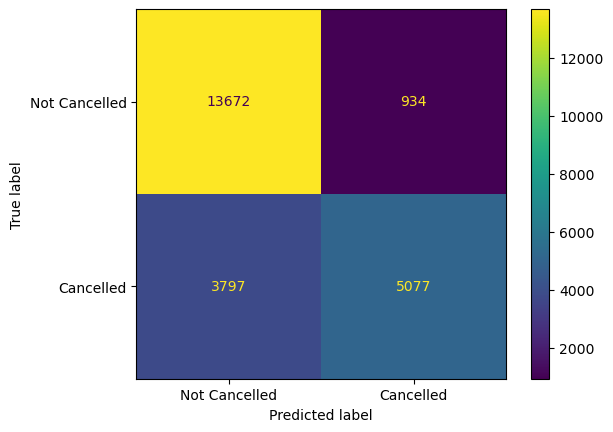

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

from sklearn.metrics import ConfusionMatrixDisplay

# Accuracy
print("Accuracy:", accuracy_score(y_test1, y_pred))

#(5067+13676)/(5067+13676+930+3807)=79.8% 

# Classification report
print("Classification Report:\n", classification_report(y_test1, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test1, y_pred))

# AUC score
print("AUC Score:", roc_auc_score(y_test1, y_pred_prob))

cm = confusion_matrix(y_test1, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ["Not Cancelled", "Cancelled"])
disp.plot()   
plt.show() 

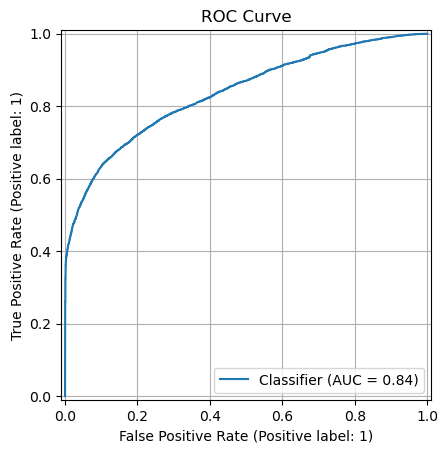

In [79]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test1, y_pred_prob)
plt.title("ROC Curve")
plt.grid(True)
plt.show()

#There's an 84% chance your model will correctly distinguish between 
#a randomly chosen cancelled and not-cancelled booking.

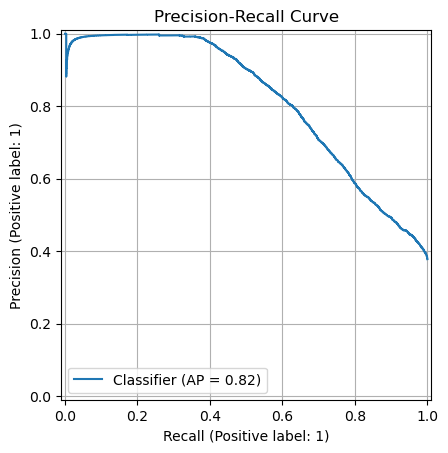

In [80]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test1, y_pred_prob)
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

# KNN Classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.pipeline import make_pipeline
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler

In [82]:
X_1= df1[["deposit_type_Non Refund", "lead_time", "total_of_special_requests", "market_segment_Groups", 
                               "distribution_channel_TA/TO", "market_segment_Direct", 
                              "distribution_channel_Direct", "booking_changes", "customer_type_Transient", 
                              "assigned_room_type_D", "customer_type_Transient-Party", "previous_cancellations", "market_segment_Corporate",
                              "assigned_room_type_E", "previous_bookings_not_canceled", "assigned_room_type_C", 
                              "reserved_room_type_D", "assigned_room_type_F", "meal_FB", "total_guests", 
                              "reserved_room_type_E", "assigned_room_type_B", 
                               "avg_daily_rate", "market_segment_Offline TA/TO", "assigned_room_type_I"]].to_numpy()

scaler = StandardScaler()

X_1_scaled = scaler.fit_transform(X_1) 

Y_1=df1[["is_canceled"]].to_numpy().ravel()

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1_scaled, Y_1, test_size=0.20, random_state=42)

In [83]:
knn=KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train_1, y_train_1)

KNeighborsClassifier(n_neighbors=10)

In [84]:
# Predict on the test set
y_test_pred = knn.predict(X_test_1)
y_test_prob = knn.predict_proba(X_test_1)[:, 1]  

y_test_prob

array([0.9, 0.1, 0. , ..., 0.4, 1. , 0.2])

In [85]:
acc = accuracy_score(y_test_1, y_test_pred)
clf_report = classification_report(y_test_1, y_test_pred)
conf_matrix = confusion_matrix(y_test_1, y_test_pred)
roc_auc = roc_auc_score(y_test_1, y_test_prob)


print("Accuracy:", acc)
print("\nClassification Report:\n", clf_report)
print("Confusion Matrix:\n", conf_matrix)
print("AUC Score:", roc_auc)

Accuracy: 0.8225298126064736

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87     14606
           1       0.84      0.66      0.74      8874

    accuracy                           0.82     23480
   macro avg       0.83      0.79      0.80     23480
weighted avg       0.82      0.82      0.82     23480

Confusion Matrix:
 [[13487  1119]
 [ 3048  5826]]
AUC Score: 0.8813871786522722


In [86]:
knn1=KNeighborsClassifier(n_neighbors=20) #while running loop since i have 25 variables with so many rows its not running so checking randomly

knn1.fit(X_train_1, y_train_1)

KNeighborsClassifier(n_neighbors=20)

In [87]:
y_test_pred1 = knn1.predict(X_test_1)
y_test_prob1 = knn1.predict_proba(X_test_1)[:, 1]  


acc1 = accuracy_score(y_test_1, y_test_pred1)
clf_report1 = classification_report(y_test_1, y_test_pred1)
conf_matrix1 = confusion_matrix(y_test_1, y_test_pred1)
roc_auc1 = roc_auc_score(y_test_1, y_test_prob1)


print("Accuracy:", acc1)
print("\nClassification Report:\n", clf_report1)
print("Confusion Matrix:\n", conf_matrix1)
print("AUC Score:", roc_auc1)

Accuracy: 0.8205706984667802

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86     14606
           1       0.83      0.65      0.73      8874

    accuracy                           0.82     23480
   macro avg       0.82      0.79      0.80     23480
weighted avg       0.82      0.82      0.82     23480

Confusion Matrix:
 [[13455  1151]
 [ 3062  5812]]
AUC Score: 0.882664505597883


Between K=10 and K=20, KNN with K=10 performs slightly better, with higher accuracy (82.27%), better F1-score (0.74 vs. 0.73), and a higher recall for cancelled bookings. The F1-score balances precision and recall, helping assess how well the model identifies cancellations without too many false positives or false negatives, making K=10 the more reliable choice for this classification task.

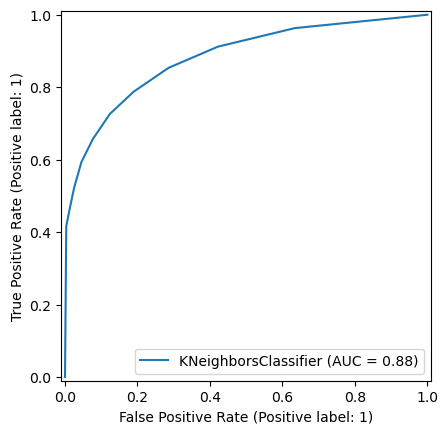

In [88]:
RocCurveDisplay.from_estimator(knn, X_test_1, y_test_1)
plt.show()

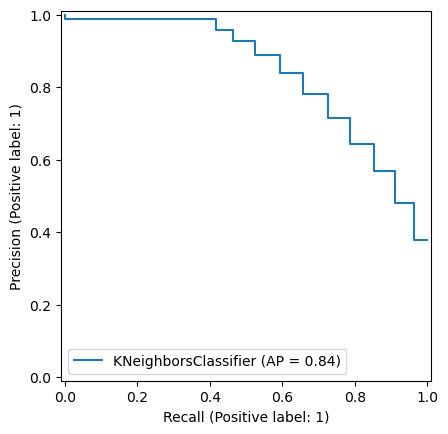

In [89]:
PrecisionRecallDisplay.from_estimator(knn, X_test_1, y_test_1)
plt.show()

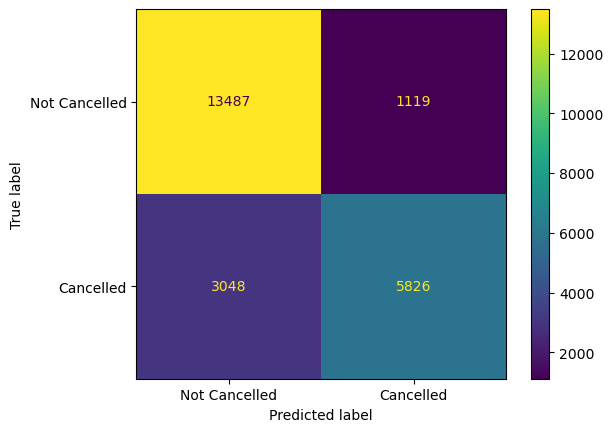

In [90]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Cancelled", "Cancelled"])
disp.plot()
plt.show()

KNN outperformed Logistic Regression across all key metrics, making it the preferred model for predicting hotel booking cancellations. However, Logistic Regression remains valuable for understanding the magnitude and direction of individual variable impacts.

# Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.model_selection import train_test_split



X = df1.drop(columns=['is_canceled'])
y = df1.is_canceled

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = RandomForestClassifier(random_state=0, n_estimators=100, max_features='sqrt')
random_forest_model = model.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.86      0.93      0.90     14606
           1       0.87      0.76      0.81      8874

    accuracy                           0.87     23480
   macro avg       0.87      0.84      0.85     23480
weighted avg       0.87      0.87      0.86     23480



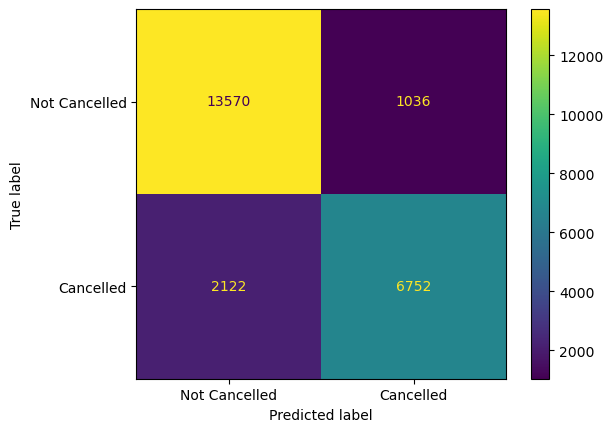

In [92]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = random_forest_model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ["Not Cancelled", "Cancelled"])
disp.plot()   
plt.show() 

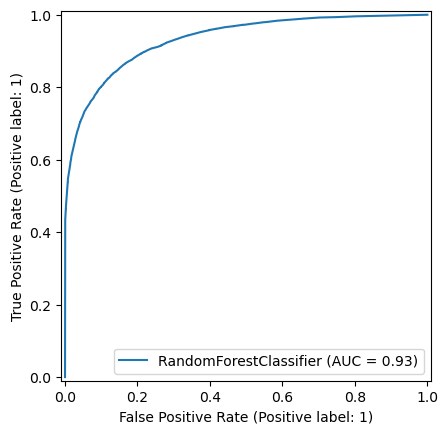

In [93]:
RocCurveDisplay.from_estimator(random_forest_model, X_test, y_test)
plt.show()

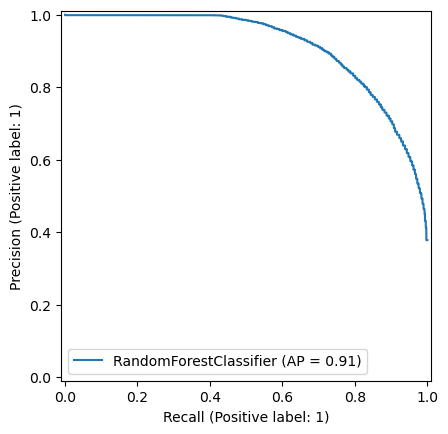

In [94]:
PrecisionRecallDisplay.from_estimator(random_forest_model, X_test, y_test)
plt.show()

Text(0, 0.5, 'Mean decrease in impurity')

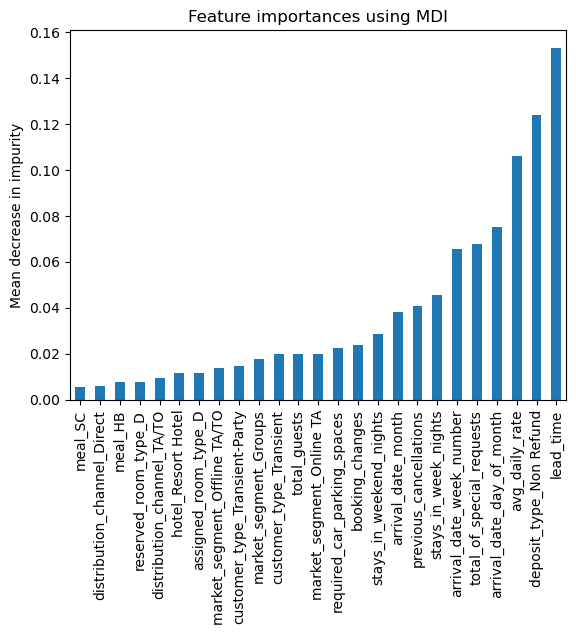

In [95]:
importances = random_forest_model.feature_importances_
feature_names = list(X_train.columns.values)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.sort_values().tail(25).plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

Random Forest outperformed both Logistic Regression and KNN across all key metrics, including precision, recall, F1-score, and accuracy, making it the most effective model for predicting hotel booking cancellations. While KNN showed better performance than Logistic Regression, Logistic Regression remains valuable for understanding the influence of individual variables due to its interpretable coefficients.